# Import Dependencies

In [25]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [26]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [27]:
a = df[(df['koi_disposition']=='CANDIDATE') | (df['koi_disposition']=='FALSE POSITIVE')]

a.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
11,FALSE POSITIVE,0,1,0,0,11.521446,1.980000e-06,-1.980000e-06,170.839688,0.000131,...,-172,4.554,0.033,-0.176,0.848,0.224,-0.075,297.07993,47.597401,15.472
12,FALSE POSITIVE,0,1,0,0,19.221389,1.120000e-06,-1.120000e-06,184.552164,0.000045,...,-200,4.496,0.052,-0.208,0.947,0.308,-0.096,295.81454,47.690350,15.341
13,FALSE POSITIVE,0,1,0,0,16.469838,1.360000e-05,-1.360000e-05,180.881761,0.000623,...,-153,4.517,0.088,-0.072,0.786,0.088,-0.088,297.15442,47.668701,15.788


# Select features (columns)

In [28]:
columns1= ['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 
       'koi_time0bk', 'koi_impact',
       'koi_duration',
       'koi_depth', 'koi_prad', 
       'koi_teq', 'koi_insol', 
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 
        'koi_slogg', 
       'koi_srad', 'ra', 'dec',
       'koi_kepmag']

In [29]:
df1 = a[columns1]
df1.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,...,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
1,FALSE POSITIVE,0,1,0,0,19.899140,175.850252,0.969,1.78220,10829.0,...,638,39.30,76.3,1,5853,4.544,0.868,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,...,1395,891.96,505.6,1,5805,4.564,0.791,285.53461,48.285210,15.597
11,FALSE POSITIVE,0,1,0,0,11.521446,170.839688,2.483,3.63990,17984.0,...,753,75.88,622.1,1,5795,4.554,0.848,297.07993,47.597401,15.472
12,FALSE POSITIVE,0,1,0,0,19.221389,184.552164,1.065,4.79843,74284.0,...,698,55.97,2317.0,1,6117,4.496,0.947,295.81454,47.690350,15.341
13,FALSE POSITIVE,0,1,0,0,16.469838,180.881761,0.292,9.43780,10479.0,...,595,29.61,303.4,1,5152,4.517,0.786,297.15442,47.668701,15.788


In [30]:
df1.shape

(5191, 21)

In [32]:
#Use `koi_disposition` for the y values

X = df1.drop('koi_disposition', axis=1)
y = df1['koi_disposition']
print(X.shape, y.shape)

(5191, 20) (5191,)


# Create a Train Test Split

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,stratify=y)

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [34]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the model

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
model = RandomForestClassifier(random_state=100)

In [36]:
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=100)

## Validate the model using the test data

In [37]:
predictions = model.predict(X_test_scaled)

In [38]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.9946057025430259
Testing Data Score: 0.9946070878274268


In [39]:
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['FALSE POSITIVE' 'FALSE POSITIVE' 'FALSE POSITIVE' 'CANDIDATE'
 'FALSE POSITIVE' 'FALSE POSITIVE' 'CANDIDATE' 'FALSE POSITIVE'
 'CANDIDATE' 'CANDIDATE']
First 10 Actual labels: ['FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'CANDIDATE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'CANDIDATE', 'FALSE POSITIVE', 'CANDIDATE', 'FALSE POSITIVE']


In [40]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,FALSE POSITIVE,FALSE POSITIVE
1,FALSE POSITIVE,FALSE POSITIVE
2,FALSE POSITIVE,FALSE POSITIVE
3,CANDIDATE,CANDIDATE
4,FALSE POSITIVE,FALSE POSITIVE
...,...,...
1293,CANDIDATE,CANDIDATE
1294,FALSE POSITIVE,FALSE POSITIVE
1295,FALSE POSITIVE,FALSE POSITIVE
1296,CANDIDATE,CANDIDATE


In [42]:
print(classification_report(y_test, predictions,
                target_names=['CANDIDATE', 'FALSE POSITIVE']))

                precision    recall  f1-score   support

     CANDIDATE       0.99      0.99      0.99       422
FALSE POSITIVE       1.00      0.99      0.99       876

      accuracy                           0.99      1298
     macro avg       0.99      0.99      0.99      1298
  weighted avg       0.99      0.99      0.99      1298



# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [43]:
## Create the model ##
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
grid = GridSearchCV(model, param_grid, verbose=3)

## Train the model ##
grid.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=200, score=0.979, total=   0.6s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=200, score=0.973, total=   0.6s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=200 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=200, score=0.972, total=   0.5s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=200, score=0.985, total=   0.6s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=200, score=0.978, total=   0.5s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=500, score=0.983, total=   1.4s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=500, score=0.977, total=   1.3s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=500, score=0.974, total=   1.3s
[CV] criterion=gini, max_depth=4, max_features=auto

[CV]  criterion=gini, max_depth=5, max_features=log2, n_estimators=200, score=0.988, total=   0.6s
[CV] criterion=gini, max_depth=5, max_features=log2, n_estimators=200 
[CV]  criterion=gini, max_depth=5, max_features=log2, n_estimators=200, score=0.976, total=   0.6s
[CV] criterion=gini, max_depth=5, max_features=log2, n_estimators=200 
[CV]  criterion=gini, max_depth=5, max_features=log2, n_estimators=200, score=0.992, total=   0.6s
[CV] criterion=gini, max_depth=5, max_features=log2, n_estimators=200 
[CV]  criterion=gini, max_depth=5, max_features=log2, n_estimators=200, score=0.988, total=   0.6s
[CV] criterion=gini, max_depth=5, max_features=log2, n_estimators=500 
[CV]  criterion=gini, max_depth=5, max_features=log2, n_estimators=500, score=0.990, total=   1.5s
[CV] criterion=gini, max_depth=5, max_features=log2, n_estimators=500 
[CV]  criterion=gini, max_depth=5, max_features=log2, n_estimators=500, score=0.988, total=   1.5s
[CV] criterion=gini, max_depth=5, max_features=log2

[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, score=0.992, total=   0.7s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, score=0.991, total=   0.7s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, score=0.982, total=   0.7s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, score=0.996, total=   0.7s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, score=0.995, total=   0.7s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, score=0.995, total=   1.8s
[CV] criterion=gini, max_depth=7, max_features=sqrt

[CV]  criterion=gini, max_depth=8, max_features=log2, n_estimators=500, score=0.996, total=   1.8s
[CV] criterion=entropy, max_depth=4, max_features=auto, n_estimators=200 
[CV]  criterion=entropy, max_depth=4, max_features=auto, n_estimators=200, score=0.982, total=   0.7s
[CV] criterion=entropy, max_depth=4, max_features=auto, n_estimators=200 
[CV]  criterion=entropy, max_depth=4, max_features=auto, n_estimators=200, score=0.976, total=   0.7s
[CV] criterion=entropy, max_depth=4, max_features=auto, n_estimators=200 
[CV]  criterion=entropy, max_depth=4, max_features=auto, n_estimators=200, score=0.976, total=   0.7s
[CV] criterion=entropy, max_depth=4, max_features=auto, n_estimators=200 
[CV]  criterion=entropy, max_depth=4, max_features=auto, n_estimators=200, score=0.990, total=   0.7s
[CV] criterion=entropy, max_depth=4, max_features=auto, n_estimators=200 
[CV]  criterion=entropy, max_depth=4, max_features=auto, n_estimators=200, score=0.982, total=   0.7s
[CV] criterion=entrop

[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, score=0.991, total=   2.0s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, score=0.981, total=   2.0s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, score=0.995, total=   2.0s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, score=0.992, total=   2.0s
[CV] criterion=entropy, max_depth=5, max_features=log2, n_estimators=200 
[CV]  criterion=entropy, max_depth=5, max_features=log2, n_estimators=200, score=0.992, total=   0.8s
[CV] criterion=entropy, max_depth=5, max_features=log2, n_estimators=200 
[CV]  criterion=entropy, max_depth=5, max_features=log2, n_estimators=200, score=0.988, total=   0.8s
[CV] criterion=ent

[CV]  criterion=entropy, max_depth=7, max_features=auto, n_estimators=200, score=0.996, total=   0.9s
[CV] criterion=entropy, max_depth=7, max_features=auto, n_estimators=200 
[CV]  criterion=entropy, max_depth=7, max_features=auto, n_estimators=200, score=0.996, total=   0.9s
[CV] criterion=entropy, max_depth=7, max_features=auto, n_estimators=500 
[CV]  criterion=entropy, max_depth=7, max_features=auto, n_estimators=500, score=0.995, total=   2.3s
[CV] criterion=entropy, max_depth=7, max_features=auto, n_estimators=500 
[CV]  criterion=entropy, max_depth=7, max_features=auto, n_estimators=500, score=0.992, total=   2.3s
[CV] criterion=entropy, max_depth=7, max_features=auto, n_estimators=500 
[CV]  criterion=entropy, max_depth=7, max_features=auto, n_estimators=500, score=0.981, total=   2.3s
[CV] criterion=entropy, max_depth=7, max_features=auto, n_estimators=500 
[CV]  criterion=entropy, max_depth=7, max_features=auto, n_estimators=500, score=0.996, total=   2.3s
[CV] criterion=ent

[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=200, score=0.995, total=   1.0s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=200 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=200, score=0.992, total=   1.0s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=200 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=200, score=0.983, total=   1.0s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=200 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=200, score=0.996, total=   1.0s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=200 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=200, score=0.996, total=   1.0s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=500 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=500, score=0.995, total=   2.5s
[CV] criterion=ent

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  6.6min finished


GridSearchCV(estimator=RandomForestClassifier(random_state=100),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             verbose=3)

In [44]:
print("Best params :", grid.best_params_)
print("Best score: ", grid.best_score_)

Best params : {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}
Best score:  0.9925525771290726


In [45]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test_scaled)
print(classification_report(y_test, predictions,
                target_names=['CANDIDATE', 'FALSE POSITIVE']))

                precision    recall  f1-score   support

     CANDIDATE       0.99      1.00      0.99       422
FALSE POSITIVE       1.00      0.99      1.00       876

      accuracy                           0.99      1298
     macro avg       0.99      0.99      0.99      1298
  weighted avg       0.99      0.99      0.99      1298



In [46]:
model1= RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='gini')

In [47]:
model1.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=8, n_estimators=500, random_state=42)

In [48]:
pred=model1.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score
print("Accuracy for Random Forest on data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on data:  0.9946070878274268


# Save the Model

In [50]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'RFmodel.sav'
joblib.dump(model1, filename)

['RFmodel.sav']

# Loading Models

In [24]:
# Logistic Regression Model
import joblib
LR_model = joblib.load('../starter_code/LRmodel.sav')
result = LR_model.score(X_test, y_test)
print('Logistic Regression Model Score: ', result)

Logistic Regression Model Score:  0.5966819221967964


# Evaluation between models

# Loading Models

In [53]:
# Logistic Regression Model
import joblib
LR_model = joblib.load('../starter_code/LRmodel.sav')
result = LR_model.score(X_test, y_test)
print('Logistic Regression Model Score: ', result)

Logistic Regression Model Score:  0.7334360554699538


In [54]:
# KNN Model
import joblib
kNN_model = joblib.load('../starter_code/KNNmodel.sav')
result = kNN_model.score(X_test, y_test)
print('KNN Model Score: ', result)

KNN Model Score:  0.674884437596302


In [55]:
# Random Forest Model
import joblib
RF_model = joblib.load('RFmodel.sav')
result = RF_model.score(X_test, y_test)
print('Random Forest Model Score: ', result)

Random Forest Model Score:  0.9946070878274268


In [56]:
# SVM Model
import joblib
SVM_model = joblib.load('../starter_code/SVMmodel.sav')
result = SVM_model.score(X_test, y_test)
print('SVM Model Score: ', result)

SVM Model Score:  0.5600924499229584


## Compare Algorithms

LR: 0.728374 (0.058590)
KNN: 0.743979 (0.044114)
RF: 0.993259 (0.005793)
SVM: 0.675021 (0.104110)


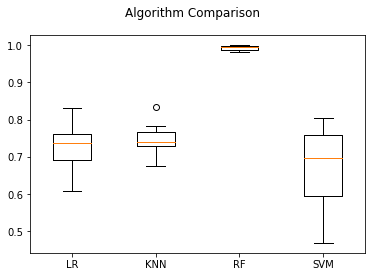

In [58]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC



# prepare configuration for cross validation test harness
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=21)))
models.append(('RF', RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='gini')))
models.append(('SVM', SVC(kernel='rbf')))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [61]:
fig.savefig("myplot.png")